<a href="https://colab.research.google.com/github/donghwi2022/ds-sa-cp2-phase2/blob/%EC%8B%A0%EB%8F%99%ED%9C%98/data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 필요 라이브러리 import 및 파일 불러오기

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv("/content/drive/MyDrive/cp2_phase2_data/fashion_log.csv", index_col=0)

In [36]:
df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,...,productDisplayName,customer_gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,first_join_date
0,2018-07-29T15:22:01,5868,194913,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24,-8.227893,...,Vans Men Black Shoes,F,2000-08-20,Android,41465,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,2018-07-28
1,2018-07-30T12:40:22,4774,155874,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03,3.013470,...,Puma Men Knitted Vest Green Sweater,F,1996-03-15,Android,40903,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,2018-07-28
2,2018-09-15T11:51:17,4774,489413,OVO,Success,0,NaN,10000,2018-09-18T08:41:49,-2.579428,...,Kiara Women Purple & Yellow Handbag,F,1996-03-15,Android,40903,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,2018-07-28
3,2018-11-01T11:23:48,4774,627839,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27,-3.602334,...,Wrangler Women Cable Red Sweater,F,1996-03-15,Android,40903,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,2018-07-28
4,2018-12-18T11:20:30,4774,742846,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07,-3.602334,...,Lakme Absolute Forever Silk Chestnut Lip Liner 03,F,1996-03-15,Android,40903,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,2018-07-28


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   session_id              1254585 non-null  int64  
 3   payment_method          1254585 non-null  object 
 4   payment_status          1254585 non-null  object 
 5   promo_amount            1254585 non-null  int64  
 6   promo_code              481139 non-null   object 
 7   shipment_fee            1254585 non-null  int64  
 8   shipment_date_limit     1254585 non-null  object 
 9   shipment_location_lat   1254585 non-null  float64
 10  shipment_location_long  1254585 non-null  float64
 11  total_amount            1254585 non-null  int64  
 12  product_id              1254585 non-null  int64  
 13  quantity                1254585 non-null  int64  
 14  it

# 2. 데이터 EDA 진행

## 1. 고객 분석

### 1. 고객별 거래량 분석
: 상위 10명과 하위 10명 데이터 추출

In [38]:
# 전체 고객의 수
print(f"전체 고객의 숫자 : {len(df.customer_id.unique())}명")

전체 고객의 숫자 : 50705명


In [39]:
trans_customer = df.groupby('customer_id').count().sort_values("created_at", ascending=False)

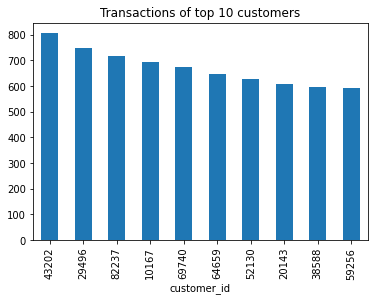

In [40]:
# 거래량 상위 고객 10명의 거래량 시각화
trans_customer.head(10)['created_at'].plot(kind = 'bar')
plt.title("Transactions of top 10 customers")
plt.show()

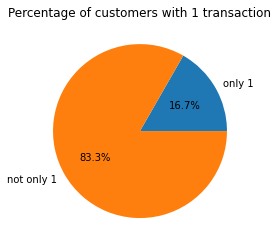

In [41]:
# 거래량이 1개뿐인 고객의 비율 시각화
labels = ["only 1", "not only 1"]
trans = [len(trans_customer[trans_customer['created_at'] == 1]), len(trans_customer[trans_customer['created_at'] != 1])]
plt.pie(trans, labels=labels, autopct='%1.1f%%')
plt.title("Percentage of customers with 1 transaction")
plt.show()

### 2. 고객의 성별 비율

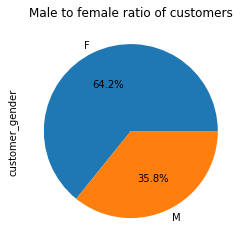

In [42]:
# 고객의 성별 비율 시각화
df.drop_duplicates(['customer_id']).customer_gender.value_counts().plot.pie(autopct='%.1f%%')
plt.title("Male to female ratio of customers")
plt.show()

### 3. transaction 기준 연령 분포
: transaction 발생 기준으로 해당 고객의 연령대 분포를 확인

In [43]:
# transaction 기준 연령대 확인(편의를 위해 10단위로 끊음)
age_group = (df['created_at'].str[:4].astype('int') - df['birthdate'].str[:4].astype('int')) // 10 * 10
age_group_num = age_group.value_counts()
age_group_num

20    624261
10    316262
30    264094
40     39148
0       7714
50      3029
60        77
dtype: int64

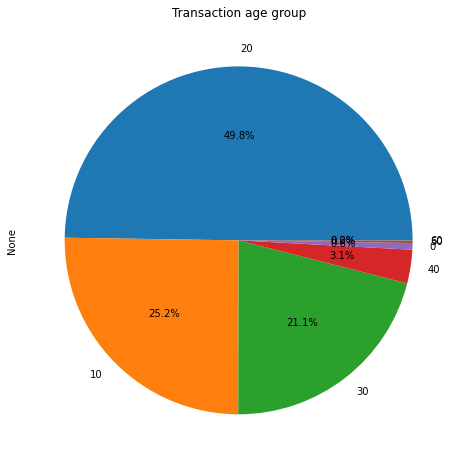

In [44]:
plt.figure(figsize=(10, 8))
age_group_num.plot.pie(autopct='%.1f%%')
plt.title("Transaction age group")
plt.show()

### 4. 고객의 연도별 변화를 확인

In [45]:
# 고객 id와 컬럼을 입력하면 확인해볼 수 있도록 모듈화
def customers_change_by_year(customer_id, column_name) : 
    sub_df = df[df['customer_id'] == customer_id].sort_values("created_at")
    sub_df['created_at'] = sub_df['created_at'].str[:4]
    sub_df
    sns.countplot(x='created_at', hue=column_name, data=sub_df)
    plt.title(f"{customer_id}'s Yearly change in {column_name}")
    plt.show()
    return

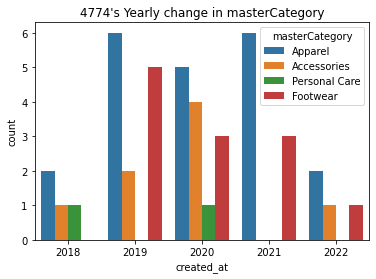

In [46]:
customers_change_by_year(4774, 'masterCategory')

## 2. 상품 분석

In [47]:
# 상품당 1개씩의 데이터만 남김
product_df = df.drop_duplicates(['product_id'])
print(f"전체 상품의 개수 : {len(product_df)}개")

전체 상품의 개수 : 44446개


### 1. 상품의 타겟 성별 비율

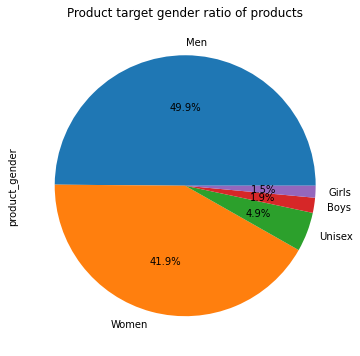

In [48]:
# 상품의 타겟 성별 비율 시각화
plt.figure(figsize=(8, 6))
product_df.product_gender.value_counts().plot.pie(autopct='%.1f%%')
plt.title("Product target gender ratio of products")
plt.show()

### 2. 상품의 분류별 비율

In [49]:
def product_ratio (column_name) : 
    plt.figure(figsize=(8, 6))
    product_df[column_name].value_counts().plot.pie(autopct='%.1f%%')
    plt.title(f"Ratio by product {column_name}")
    plt.show()
    return product_df[column_name].value_counts()

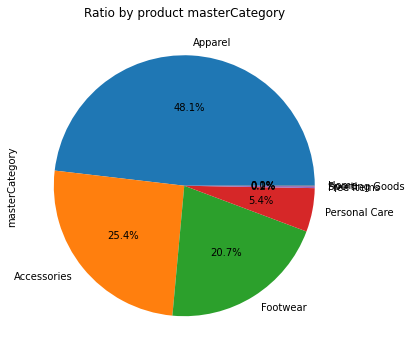

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [50]:
product_ratio('masterCategory')

### 3. 상품의 사용 복장 

In [51]:
# 상품의 사용 복장
product_df['usage'].value_counts()

Casual          34414
Sports           4025
Ethnic           3208
Formal           2359
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

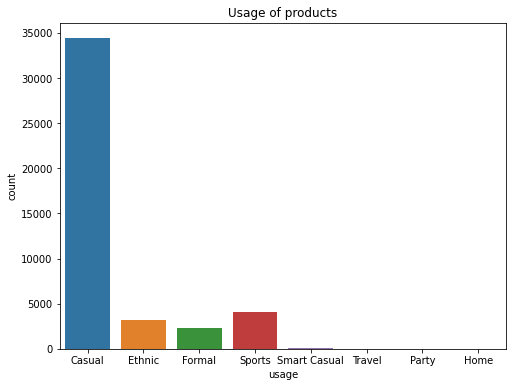

In [52]:
# 상품의 사용 복장 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='usage',data=product_df)
plt.title("Usage of products")
plt.show()

### 4. 고객들이 많이 찾은 계절 복장

In [53]:
# 고객들이 많이 찾은 계절 복장
df['season'].value_counts()

Summer    606432
Fall      322237
Winter    240945
Spring     84368
Name: season, dtype: int64

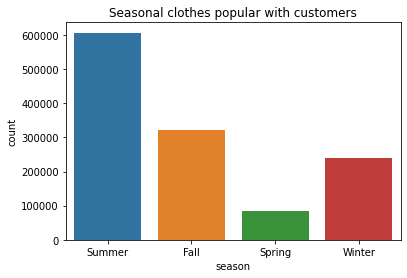

In [54]:
# 시각화
sns.countplot(x='season', data=df)
plt.title("Seasonal clothes popular with customers")
plt.show()

### 5. 구매 성공-실패 비율

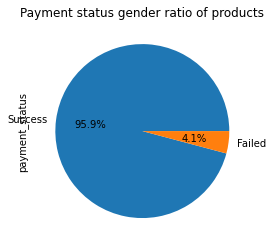

In [64]:
product_df.payment_status.value_counts().plot.pie(autopct='%.1f%%')
plt.title("Payment status gender ratio of products")
plt.show()

## 3. 디바이스 분석

### 1. 디바이스 비율

In [55]:
# 사용 디바이스 비율
df.device_type.value_counts()

Android    966804
iOS        287781
Name: device_type, dtype: int64

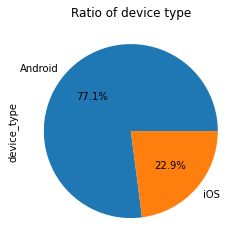

In [56]:
# 시각화
df.device_type.value_counts().plot.pie(autopct='%.1f%%')
plt.title("Ratio of device type")
plt.show()

## 4. 컬럼의 연도별 변화 확인

In [57]:
# 카테고리형 데이터에 대해서 연도별 개수 확인
def change_by_year(column_name) : 
    sub_df = df.sort_values("created_at")
    sub_df['created_at'] = sub_df['created_at'].str[:4]
    plt.figure(figsize=(8, 6))
    sns.countplot(x='created_at', hue=column_name, data=sub_df)
    plt.xlabel('Year')
    plt.title(f"Yearly change in {column_name}")
    plt.show()
    return

### 1. 연도별 디바이스 타입 변화

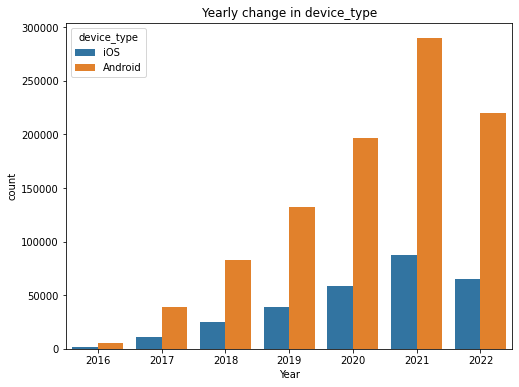

In [58]:
change_by_year('device_type')

### 2. 연도별 결제 방식 변화

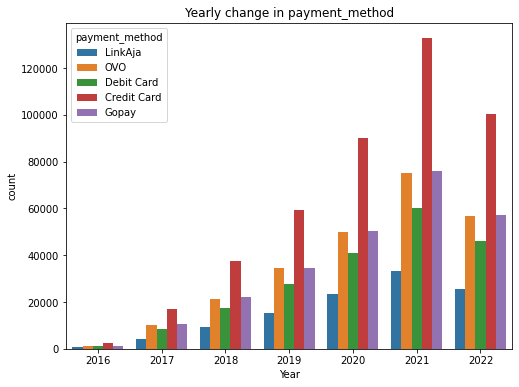

In [59]:
change_by_year('payment_method')

## 5. 컬럼의 계절별 변화 확인

In [60]:
# 계절을 구분하는 함수
def season_division (month) :
    month = int(month)
    season = ""
    if month >= 3 and month <= 5 :
        season = "Spring"
    if month >= 6 and month <= 8 :
        season = "Summer"
    if month >= 9 and month <= 11 :
        season = "Fall"
    if month == 12 or month <= 2 :
        season = "Winter"
    return season

# 카테고리형 데이터에 대해서 계절별 개수 확인
def change_by_season(column_name) : 
    sub_df = df.copy()
    sub_df['created_at'] = sub_df['created_at'].str[5:7]
    sub_df['created_season'] = sub_df['created_at'].apply(season_division)
    sub_df.sort_values("created_season")
    plt.figure(figsize=(8, 6))
    sns.countplot(x='created_season', hue=column_name, data=sub_df)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel('Season')
    plt.title(f"Seasonal change in {column_name}")
    plt.show()
    return

### 1. 계절별 결제 방식

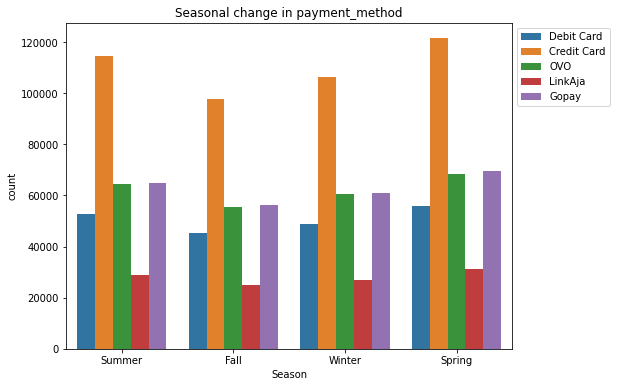

In [61]:
change_by_season('payment_method')

### 2. 계절별 상품 masterCategory

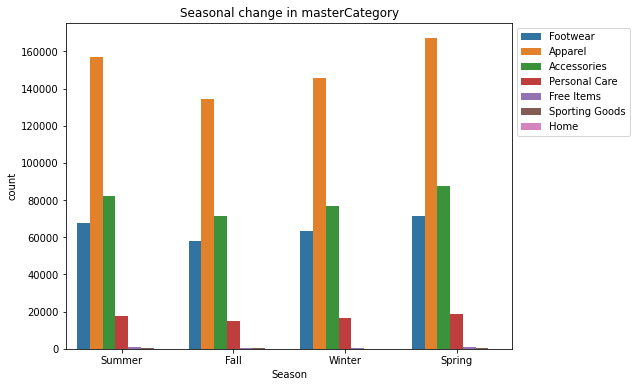

In [62]:
change_by_season('masterCategory')